<font color='red'>
Grade: 100

Part 1
    
(a): Good
    
(b): Good
    
Part 2: Good  
 
Part 3: Good
    
Part 4: Good
    
Part 5: Good
    
Part 6
    
(a): Good
    
(b): Good
    
Part 7: Good
    
Part 8
    
(a): Good
    
(b): Good
    
Part 9: Good
    
Part 10: Good

In [1]:
#Import library

import numpy as np
import scipy as sp
import pandas as pd
import sklearn.linear_model
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import scipy.io as sio
import matplotlib as mpl
from matplotlib.pylab import rcParams
from sklearn.decomposition import PCA
from scipy.optimize import approx_fprime
import re
from scipy.optimize import fmin_cg
from sklearn.neighbors import NearestNeighbors

In [2]:
#Check Working directory location
import os
print(os.getcwd())

/Users/siuyinlee/OneDrive/School/Math 5027 Machine Learning/Exam/Final Project


In [3]:
#Load data
movies = sio.loadmat("movies.mat")

In [4]:
#Extract the rating matrix and the mask matrix
Y = movies["Y"]
R = movies["R"]

### Part 1a - Draw a histogram of the number of movies a user rated

In [5]:
Num_movies_each_user= R.sum(axis=0)

Text(0.5, 1.0, 'Histogram of the number of movies a user rated')

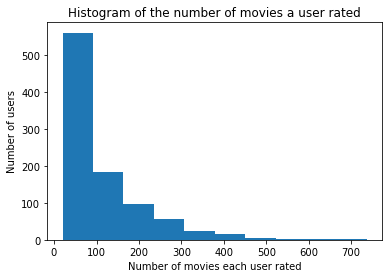

In [6]:
plt.hist(Num_movies_each_user)
plt.xlabel ("Number of movies each user rated")
plt.ylabel ("Number of users")
plt.title("Histogram of the number of movies a user rated")

### Part 1b compute the average movie rating for the first movie - Toy Story with the np.mean function

In [7]:
#Method 1, use the rating matrix only, calculate non-zero average of each row/movie, choose the first movie
avg_ToyStory_rate_v1 = np.mean(Y, where = Y>0, axis=1)[0]
avg_ToyStory_rate_v1

3.8783185840707963

In [8]:
#Method 2, use the first row of the rating matrix and the indicator matrix, average values where the indicator value is not zero
avg_ToyStory_rate_v2 = np.mean(Y[0,:], where = R[0,:]>0)
avg_ToyStory_rate_v2

3.8783185840707963

### Part 2 write a function using for loops to calculate the cost function of the collaborative learning algorithm.

In [9]:
#Load the data 'movieParams.mat'
movieParams = sio.loadmat("movieParams.mat")

In [10]:
#See what's inside the data file
movieParams.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'Theta', 'num_users', 'num_movies', 'num_features'])

In [11]:
#Define feature X
X = movieParams['X']
X.shape

(1682, 10)

In [12]:
#Define feature Theta
Theta = movieParams['Theta']
Theta.shape

(943, 10)

In [13]:
#Set values as instructed
num_users = 4
num_movies = 5
num_features = 3
params = np.concatenate([X[:num_movies,:num_features].flatten(), Theta[:num_users, :num_features].flatten()])

In [14]:
#Define the cost function using matrix calculation
def cofiCostFunc(params, Y, R, num_users, num_movies, num_features, la=0):
    """
    The function using matrix form (vectorization) to compute the cost function of the
    collaborative learning algorithm
    Input:
    params: a 1D numpy array of size (n_m times n_f+n_u times n_f,) that stores the values of
            X and Theta at which the cost function will be evaluated
    Y: the Y matrix of size (n_m, n_u) that stores the user ratings
    R: the R indicator matrix of size (n_m, n_u)
    num_users: scalar, the number of users, n_u
    num_movies: scalar, the number of movies, n_m
    num_features: scalar, the number of features n_f
    la: scalar, set to 0 by default, not useful in this function here,
        but it will be used later for penalized cost function

    Return:
    J: a scaler, which is the cost function value
    """
    X = params[:num_movies*num_features].reshape(num_movies, num_features)
    Theta = params[num_movies*num_features:].reshape(num_users, num_features)
    J = 0.5*np.sum((R*X.dot(Theta.T)-Y)**2)
    return J

In [15]:
#Test using the matrix calculation of the cost function
cofiCostFunc(params, Y[:num_movies, :num_users], R[:num_movies, :num_users], num_users, num_movies, num_features, la=0)



22.224603725685675

In [16]:
def cofiCostFunc_v1(params, Y, R, num_users, num_movies, num_features, la=0):
    """
    The function using for loops to compute the cost function of the
    collaborative learning algorithm
    Input:
    params: a 1D numpy array of size (n_m times n_f+n_u times n_f,) that stores the values of
            X and Theta at which the cost function will be evaluated
    Y: the Y matrix of size (n_m, n_u) that stores the user ratings
    R: the R indicator matrix of size (n_m, n_u)
    num_users: scalar, the number of users, n_u
    num_movies: scalar, the number of movies, n_m
    num_features: scalar, the number of features n_f
    la: scalar, set to 0 by default, not useful in this function here,
        but it will be used later for penalized cost function

    Return:
    J: a scaler, which is the cost function value
    """

# first get X and Theta matrix from params
    X = params[:num_movies*num_features].reshape(num_movies, num_features)
    Theta = params[num_movies*num_features:].reshape(num_users, num_features)

# Calculating the cost function value using for loop(s)
    J=0
    for i in range(num_movies):
        for j in range(num_users):
            J+=(R[i][j]*X.dot(Theta.T)[i][j]-Y[i][j])**2
    J = J/2
    return J

In [17]:
#Test for-loop cost function
cofiCostFunc_v1(params, Y[:num_movies, :num_users], R[:num_movies, :num_users], num_users, num_movies, num_features, la=0)

22.22460372568567

In [18]:
# Test for-loop cost function using integers input
cofiCostFunc_v1(params, Y[:5, :4], R[:5, :4], 4, 5, 3, la=0)

22.22460372568567

In [19]:
# Doublec check it's the same result as the matrix calculation
cofiCostFunc(params, Y[:5, :4], R[:5, :4], 4, 5, 3, la=0)


22.224603725685675

### Part 3 Define the gradient function

In [20]:
#Define gradient function using given code
def cofiGradientFunc(params, Y, R, num_users, num_movies, num_features, la=0):
    """
    The function using matrix form (vectorization) to compute the gradient
    of the cost function of the collaborative learning algorithm
    Input:
    params: a 1D numpy array of size (n_m times n_f+n_u times n_f,) that stores the values of
            X and Theta at which the cost function will be evaluated
    Y: the Y matrix of size (n_m, n_u) that stores the user ratings
    R: the R indicator matrix of size (n_m, n_u)
    num_users: scalar, the number of users, n_u
    num_movies: scalar, the number of movies, n_m
    num_features: scalar, the number of features n_f
    la: scalar, set to 0 by default, not useful in this function here,
        but it will be used later for penalized gradient function

    Return:
    J: a 1D numpy array of the same size as params, which is the gradient vector
    """
    X = params[:num_movies*num_features].reshape(num_movies, num_features)
    Theta = params[num_movies*num_features:].reshape(num_users, num_features)
    X_grad = (R*(X.dot(Theta.T)-Y)).dot(Theta)
    Theta_grad = (R*(X.dot(Theta.T)-Y)).T.dot(X)
    grad = np.concatenate([X_grad.flatten(), Theta_grad.flatten()])
    return grad

In [21]:
#Test gradient function using parameters given in Part 2
cofiGradientFunc(params, Y[:5, :4], R[:5, :4], 4, 5, 3, la=0)


array([ -2.52899165,   7.57570308,  -1.89979026,  -0.56819597,
         3.35265031,  -0.52339845,  -0.83240713,   4.91163297,
        -0.76677878,  -0.38358278,   2.26333698,  -0.35334048,
        -0.80378006,   4.74271842,  -0.74040871, -10.5680202 ,
         4.62776019,  -7.16004443,  -3.05099006,   1.16441367,
        -3.47410789,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ])

In [22]:
#Check gradient function calculation using approx_fprime function of scipy
approx_fprime(params, cofiCostFunc, 0.001, Y[:5, :4], R[:5, :4], 4, 5, 3)

array([ -2.52882339,   7.57722481,  -1.8997053 ,  -0.56815523,
         3.35406869,  -0.52336389,  -0.83236639,   4.91305134,
        -0.76674421,  -0.38354205,   2.26475536,  -0.35330591,
        -0.80373932,   4.7441368 ,  -0.74037414, -10.56641733,
         4.62839051,  -7.1588951 ,  -3.05044019,   1.16449376,
        -3.47339493,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ])

### Part 4 Write a Regularized cost function using for-loop

In [23]:
#define the provided cofiCostFunc_Reguarlized

def cofiCostFunc_Regularized(params, Y, R, num_users, num_movies, num_features, la):
    """
    The function using matrix form (vectorization) to compute the penalized
    cost function of the collaborative learning algorithm

    Input:
    params: a 1D numpy array of size (n_m times n_f+n_u times n_f,) that stores the values of
            X and Theta at which the penalized cost function will be evaluated
    Y: the Y matrix of size (n_m, n_u) that stores the user ratings
    R: the R indicator matrix of size (n_m, n_u)
    num_users: scalar, the number of users, n_u
    num_movies: scalar, the number of movies, n_m
    num_features: scalar, the number of features n_f
    la: scalar, the penalization coefficient

    Return:
    J: scalar, the penalized cost function
    """
    X = params[:num_movies*num_features].reshape(num_movies, num_features)
    Theta = params[num_movies*num_features:].reshape(num_users, num_features)
    J = 0.5*np.sum((R*X.dot(Theta.T)-Y)**2)

    J = J + la/2*(np.sum(X**2) + np.sum(Theta**2))

    return J

In [24]:
#Write the regularized cost function using for-loop
def cofiCostFunc_v2(params, Y, R, num_users, num_movies, num_features, la=0):
    """
    The function using for loops to compute the cost function of the
    collaborative learning algorithm
    Input:
    params: a 1D numpy array of size (n_m times n_f+n_u times n_f,) that stores the values of
            X and Theta at which the cost function will be evaluated
    Y: the Y matrix of size (n_m, n_u) that stores the user ratings
    R: the R indicator matrix of size (n_m, n_u)
    num_users: scalar, the number of users, n_u
    num_movies: scalar, the number of movies, n_m
    num_features: scalar, the number of features n_f
    la: scalar, set to 0 by default, not useful in this function here,
        but it will be used later for penalized cost function

    Return:
    J: a scaler, which is the cost function value
    """

# first get X and Theta matrix from params
    X = params[:num_movies*num_features].reshape(num_movies, num_features)
    Theta = params[num_movies*num_features:].reshape(num_users, num_features)

# Calculating the cost function value using for loop(s)
    J=0
    for i in range(num_movies):
        for j in range(num_users):
            J+=(R[i][j]*X.dot(Theta.T)[i][j]-Y[i][j])**2
    J = J/2

# Calculate penalized term 1
    P1 = 0
    for i in range(num_movies):
        for j in range(num_features):
            P1+= (X[i][j])**2

# Caulcaulate penalized term 2
    P2 = 0
    for i in range(num_users):
        for j in range(num_features):
            P2+= (Theta[i][j])**2

    J = J + la/2*(P1+P2)
    return J

In [25]:
#Test the provided regularized cost function with instructed value
cofiCostFunc_Regularized(params, Y[:5, :4], R[:5, :4], 4, 5, 3, la=1.5)

31.34405624427422

In [26]:
#Test the written for-loop regularized cost function
cofiCostFunc_v2(params, Y[:5, :4], R[:5, :4], 4, 5, 3, la=1.5)

31.344056244274213

### Part 5 - Regularized gradient

In [27]:
#Define the provided regularized gradient function
def cofiGradientFunc_Regularized(params, Y, R, num_users, num_movies, num_features, la):
    """
    The function using matrix form (vectorization) to compute the gradient
    of the penalized cost function of the collaborative learning algorithm

    Input:
    params: a 1D numpy array of size (n_m times n_f+n_u times n_f,) that stores the values of
            X and Theta at which the gradient will be evaluated
    Y: the Y matrix of size (n_m, n_u) that stores the user ratings
    R: the R indicator matrix of size (n_m, n_u)
    num_users: scalar, the number of users, n_u
    num_movies: scalar, the number of movies, n_m
    num_features: scalar, the number of features n_f
    la: scalar, the penalization coefficient

    Return:
    grad : a 1D numpy array of the same size as params, which is the gradient vector
    """
    X = params[:num_movies*num_features].reshape(num_movies, num_features)
    Theta = params[num_movies*num_features:].reshape(num_users, num_features)
    X_grad = (R*(X.dot(Theta.T)-Y)).dot(Theta)
    Theta_grad = (R*(X.dot(Theta.T)-Y)).T.dot(X)

    X_grad = X_grad + la*X
    Theta_grad = Theta_grad + la*Theta

    grad = np.concatenate([X_grad.flatten(), Theta_grad.flatten()])
    return grad

In [28]:
#Test the provided regularized gradient function with instructed value
cofiGradientFunc_Regularized(params, Y[:5, :4], R[:5, :4], 4, 5, 3, la=1.5)

array([ -0.95596339,   6.97535514,  -0.10861109,   0.60308088,
         2.77421145,   0.25839822,   0.12985616,   4.0898522 ,
        -0.89247334,   0.29684395,   1.06300933,   0.66738144,
         0.60252677,   4.90185327,  -0.19747928, -10.13985478,
         2.10136256,  -6.76563628,  -2.29347024,   0.48244098,
        -2.99791422,  -0.64787484,  -0.71820673,   1.27006666,
         1.09289758,  -0.40784086,   0.49026541])

In [29]:
# Test the gradient result with approx_fprime
approx_fprime(params, cofiCostFunc_Regularized, 0.001, Y[:5, :4], R[:5, :4], 4, 5, 3, 1.5)

array([ -0.95504514,   6.97762687,  -0.10777613,   0.60387162,
         2.77637982,   0.25918279,   0.1306469 ,   4.09202057,
        -0.89168878,   0.29763469,   1.0651777 ,   0.66816601,
         0.60331751,   4.90402165,  -0.19669471, -10.13750191,
         2.10274288,  -6.76373695,  -2.29217037,   0.48327107,
        -2.99645126,  -0.64712484,  -0.71745673,   1.27081666,
         1.09364758,  -0.40709086,   0.49101541])

### Part 6 Add your own rating, write a for-loop, concatenate, make a scatter plot

In [30]:
# Run the rating as provided

In [31]:
n_m = Y.shape[0]
my_ratings = np.zeros(n_m)
my_ratings[0] = 4
my_ratings[97] = 2
my_ratings[6] = 3
my_ratings[11] = 5
my_ratings[53] = 4
my_ratings[63] = 5
my_ratings[65] = 3
my_ratings[68] = 5
my_ratings[182] = 4
my_ratings[225] = 5
my_ratings[354] = 5

In [32]:
with open('movie_ids.txt', encoding="ISO-8859-1") as f:
    movies = f.readlines()

#### For-loop

In [33]:
#Print the summary of rating with requested format with a for loop
for i in np.where(my_ratings>0)[0]:
    print("Rated",my_ratings[i],"for",[re.sub(r'^\d* ', '', s) for s in movies][i])

Rated 4.0 for Toy Story (1995)

Rated 3.0 for Twelve Monkeys (1995)

Rated 5.0 for Usual Suspects, The (1995)

Rated 4.0 for Outbreak (1995)

Rated 5.0 for Shawshank Redemption, The (1994)

Rated 3.0 for While You Were Sleeping (1995)

Rated 5.0 for Forrest Gump (1994)

Rated 2.0 for Silence of the Lambs, The (1991)

Rated 4.0 for Alien (1979)

Rated 5.0 for Die Hard 2 (1990)

Rated 5.0 for Sphere (1998)



#### Concatenate

In [34]:
#Convert the rating to integers to align with matrix Y's entries
my_ratings = my_ratings.astype(int)
#Turn it into a 2-d array
my_ratings = my_ratings.reshape(Y.shape[0],1)
#Concatenate my_rating to Y matix
Y = np.concatenate((Y, my_ratings), axis=1)

In [35]:
#Check Y-shape
Y.shape

(1682, 944)

In [36]:
#Make a column of zeros for R-matrix
zero = np.zeros(R.shape[0])
#Turn this column of zeros into 2-d array
zero = zero.reshape(R.shape[0],1)


In [37]:
#Make a list of index for rated movie
one_index = np.where(my_ratings>0)[0]

In [38]:
#Flip those one_index positions in the zero column to 1
zero[one_index] = 1

In [39]:
#Concatenate the 1-flagged zero columns to the R matrix
R = np.concatenate((R, zero), axis=1)

In [40]:
#Check R shape
R.shape


(1682, 944)

#### Make a scatter plot

Text(0, 0.5, 'Ratings')

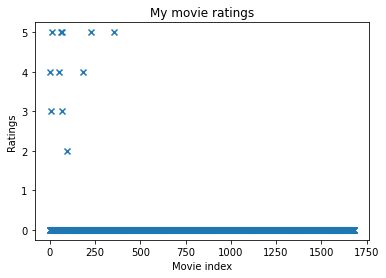

In [41]:
plt.scatter(range(1682), Y[:,-1], marker="x")
plt.title("My movie ratings")
plt.xlabel("Movie index")
plt.ylabel("Ratings")

Text(0, 0.5, 'Rated or not (1=yes, 0=no)')

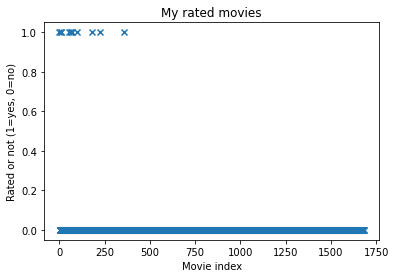

In [42]:
plt.scatter(range(1682), R[:,-1], marker="x")
plt.title("My rated movies")
plt.xlabel("Movie index")
plt.ylabel("Rated or not (1=yes, 0=no)")

### Part 7 Write a function for mean-normalization

In [43]:
#Write the mean-normalization function
def mean_normalize(Y):
    """
    Perform mean-normalization for Y
    Input:
    Y: 2D numpy array of shape (1682, 944), the original ratings (with the newly
       added ratings by you)
    R: 2D numpy array of shape (1682, 944), the indicator matrix. NOTE that you may not need
       to use R to mean-normalize Y. If you don't use it, that's fine too.
    Return:
    Y_mean: 1d array of shape (num_movies=1682), the row means of Y
    Y_normalized: 2d array of the same shape as Y, the mean-normalized Y.
    """

    # make a copy of Y to prevent you directly changing Y, which will change the original data.
    # Do not change the original R either in this function
    Y_normalized = Y.copy()
    Y_normalized = Y_normalized.astype(np.float64)
    # Now complete the function
    Y_mean = np.mean(Y, where = Y>0, axis=1)
    for i in range(Y_normalized.shape[0]):
        row = Y_normalized[i,:]
        Y_normalized[i] = np.where(row>0, row - Y_mean[i], row)

    return Y_mean, Y_normalized

#### Check function output

In [44]:
#Define function output
Y_mean = mean_normalize(Y)[0]
Y_normalized = mean_normalize(Y)[1]

In [45]:
#Sum all rows of the Y_normalized matrix
check = np.sum(Y_normalized, axis=1)
check

array([-2.35367281e-14, -8.88178420e-16,  1.06581410e-14, ...,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

In [46]:
#See if the sum of all row mean equals to zero
np.sum(check)

8.542055951465954e-13

In [47]:
#Convert the row means to integer to count the number of non-zero
np.count_nonzero(check.astype('int'))


0

In [48]:
#Take a look at the Y_mean
Y_mean

array([3.8785872 , 3.20610687, 3.03333333, ..., 2.        , 3.        ,
       3.        ])

In [49]:
#Y_mean should equal to this
np.mean(Y, where = Y>0, axis=1)

array([3.8785872 , 3.20610687, 3.03333333, ..., 2.        , 3.        ,
       3.        ])

### Part 8a Call cofiCostFunc_Regularized to get initial cost based on initial guess

In [50]:
#Use given code
# Set the correct parameters (constant values)
num_users = Y.shape[1]
num_movies = Y.shape[0]
num_features = 10
# initial values of X and Theta
np.random.seed(10)
X = np.random.normal(size=(num_movies, num_features))
Theta = np.random.normal(size=(num_users, num_features))
initial_guess = np.concatenate([X.flatten(), Theta.flatten()])
la = 10

In [51]:
#Call the cofiCostFunc_Regularized function to see if we get expected result
cofiCostFunc_Regularized(initial_guess, Y_normalized, R, num_users, num_movies, num_features, la)

669101.3614292007

In [52]:
#Use the provided code to train the model with gradient descent solver - fmin_cg
# Start training
result = fmin_cg(cofiCostFunc_Regularized, initial_guess,
                 cofiGradientFunc_Regularized,
                 args=(Y_normalized, R, num_users, num_movies, num_features, la))


Optimization terminated successfully.
         Current function value: 38951.847560
         Iterations: 425
         Function evaluations: 641
         Gradient evaluations: 641


### Part 9 - Make movie recommendations to yourself

In [53]:
#Part 9.1
#Obtain X and Theta matrices and check the shape
X = result[:num_movies*num_features].reshape(num_movies,num_features)
Theta = result[num_movies*num_features:].reshape(num_users, num_features)
print(result.shape)
print(X.shape)
print(Theta.shape)

(26260,)
(1682, 10)
(944, 10)


In [54]:
#Part 9.2
#Make prediction matrix P and check it's shape
P = X.dot(Theta.T)
P.shape

(1682, 944)

In [55]:
#Part 9.3
#Extract last column of P and call it p_user
p_user = P[:,-1]
p_user.shape

(1682,)

In [56]:
#Add the Y_mean vector to p_user so it is back to original rating scale 1-5
p_user = p_user + Y_mean

In [57]:
#Find the index of the 20 largest values of p_user, descending order based on rating
p_user.argsort()[::-1][:20]

array([1598,  813, 1652, 1535, 1499, 1121, 1188, 1200, 1292, 1466, 1448,
         49,   63,  118, 1397,  168, 1641, 1593,  317,  173])

In [58]:
#See those top 20 rating values, descending value
p_user[p_user.argsort()[::-1][:20]]

array([5.        , 5.        , 5.        , 5.        , 5.        ,
       5.        , 5.        , 5.        , 5.        , 5.        ,
       4.64241047, 4.63341487, 4.55077899, 4.51658032, 4.5038744 ,
       4.49918942, 4.49610997, 4.49069418, 4.48753053, 4.48321126])

In [59]:
#Write a for loop to print out the top 20 movies
rec_index = p_user.argsort()[::-1][:20]
for i in rec_index:
    print("Recommending movie",[re.sub(r'^\d* ', '', s) for s in movies][i], "based on rating", np.around(p_user[i], decimals=2))

Recommending movie Someone Else's America (1995)
 based on rating 5.0
Recommending movie Great Day in Harlem, A (1994)
 based on rating 5.0
Recommending movie Entertaining Angels: The Dorothy Day Story (1996)
 based on rating 5.0
Recommending movie Aiqing wansui (1994)
 based on rating 5.0
Recommending movie Santa with Muscles (1996)
 based on rating 5.0
Recommending movie They Made Me a Criminal (1939)
 based on rating 5.0
Recommending movie Prefontaine (1997)
 based on rating 5.0
Recommending movie Marlene Dietrich: Shadow and Light (1996) 
 based on rating 5.0
Recommending movie Star Kid (1997)
 based on rating 5.0
Recommending movie Saint of Fort Washington, The (1993)
 based on rating 5.0
Recommending movie Pather Panchali (1955)
 based on rating 4.64
Recommending movie Star Wars (1977)
 based on rating 4.63
Recommending movie Shawshank Redemption, The (1994)
 based on rating 4.55
Recommending movie Maya Lin: A Strong Clear Vision (1994)
 based on rating 4.52
Recommending movie An

### Part 10 User-User Collaborative Filtering by KNN

In [60]:
#Define the given function
def KNNCofi(K, Y, R, movie_n, Y_col_mean):
    """
    Find the K nearest neighbors of the user with ratings of the movie_n th movie
    """
    data = Y[:, R[movie_n,:].astype(bool)]
    if data.shape[1] >= K:
        knn = NearestNeighbors(metric='cosine', algorithm='brute',
                               n_neighbors=K, n_jobs=-1)
    else:
        knn = NearestNeighbors(metric='cosine', algorithm='brute',
                               n_neighbors=data.shape[1], n_jobs=-1)
    knn.fit(data.T)
    neigh_dist, neigh_ind = knn.kneighbors(np.reshape(Y[:, -1], (1, num_movies)))
    # rating_pred = np.dot(neigh_dist[0,:], data[movie_n, neigh_ind[0,:]])/(np.sum(neigh_dist[0,:]))
    rating_pred = np.mean(data[movie_n, neigh_ind[0,:]]+Y_col_mean[R[movie_n,:].astype(bool)][neigh_ind[0,:]])
    return rating_pred

def UserUserCofi(Y, R, K=9):
    """
    Y: 2D numpy array of shape (1682, 944), the original ratings (with the newly
       added ratings by you)
    R: 2D numpy array of shape (1682, 944), the indicator matrix. NOTE that you may not need
       to use R to mean-normalize Y. If you don't use it, that's fine too.
    K: integer, specify the how many nearest neighbors to use
    Return:
    ratings_pred: 1D array of size num_movies, the predicted ratings for all
                the movie the user did not rate. For the movies, the user has
                predicted, the value in ratings_pred will be zero
    """
    Y_col_normalized = Y.copy()
    Y_col_mean = np.zeros(Y.shape[1])
    for i in range(Y.shape[1]):
        Y_col_mean[i] = np.mean(Y[R[:, i].astype(bool), i])
        Y_col_normalized[R[:, i].astype(bool), i] = Y[R[:, i].astype(bool), i] - Y_col_mean[i]

    ratings_pred = np.zeros(Y.shape[0])
    for i in range(Y.shape[0]):
        if (R[i,-1] == 0):
            ratings_pred[i] = KNNCofi(K, Y_col_normalized, R, i, Y_col_mean)
    return ratings_pred

In [61]:
#Call the UserUserCofi function with default k to get movies predicted rating for me
User_pred = UserUserCofi(Y, R, K=9)

In [62]:
#Find the index of the 20 largest values of p_user, descending order based on rating
User_pred.argsort()[::-1][:20]

array([1652, 1188, 1598, 1499, 1466, 1292, 1593,  118,   49,  168,  317,
       1535,  482,  473,   27,   85,  188,  172,  407,  704])

In [63]:
#See those top 20 rating values, descending value
User_pred[User_pred.argsort()[::-1][:20]]

array([4.70588235, 4.58591631, 4.58174905, 4.5264977 , 4.50688025,
       4.48930309, 4.48313987, 4.3421092 , 4.33383322, 4.33216741,
       4.32799056, 4.29537367, 4.27247352, 4.27226849, 4.26753572,
       4.25511036, 4.2528611 , 4.23676673, 4.23310942, 4.22823553])

In [64]:
#Write a for loop to print out the top 20 movies
rec_index_2 = User_pred.argsort()[::-1][:20]
for i in rec_index_2:
    print("Recommending movie",[re.sub(r'^\d* ', '', s) for s in movies][i], "based on rating", np.around(User_pred[i], decimals=2))

Recommending movie Entertaining Angels: The Dorothy Day Story (1996)
 based on rating 4.71
Recommending movie Prefontaine (1997)
 based on rating 4.59
Recommending movie Someone Else's America (1995)
 based on rating 4.58
Recommending movie Santa with Muscles (1996)
 based on rating 4.53
Recommending movie Saint of Fort Washington, The (1993)
 based on rating 4.51
Recommending movie Star Kid (1997)
 based on rating 4.49
Recommending movie Everest (1998)
 based on rating 4.48
Recommending movie Maya Lin: A Strong Clear Vision (1994)
 based on rating 4.34
Recommending movie Star Wars (1977)
 based on rating 4.33
Recommending movie Wrong Trousers, The (1993)
 based on rating 4.33
Recommending movie Schindler's List (1993)
 based on rating 4.33
Recommending movie Aiqing wansui (1994)
 based on rating 4.3
Recommending movie Casablanca (1942)
 based on rating 4.27
Recommending movie Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)
 based on rating 4.27
Recommending